<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-梯度下降" data-toc-modified-id="1.-梯度下降-1">1. 梯度下降</a></span><ul class="toc-item"><li><span><a href="#1.1-批量梯度下降（BGD）" data-toc-modified-id="1.1-批量梯度下降（BGD）-1.1">1.1 批量梯度下降（BGD）</a></span><ul class="toc-item"><li><span><a href="#1.1.1-学习率的设置" data-toc-modified-id="1.1.1-学习率的设置-1.1.1">1.1.1 学习率的设置</a></span></li><li><span><a href="#1.1.2-Python-实现-BGD" data-toc-modified-id="1.1.2-Python-实现-BGD-1.1.2">1.1.2 Python 实现 BGD</a></span></li></ul></li><li><span><a href="#1.2-随机梯度下降（SGD）" data-toc-modified-id="1.2-随机梯度下降（SGD）-1.2">1.2 随机梯度下降（SGD）</a></span><ul class="toc-item"><li><span><a href="#1.2.1-Python-实现-SGD" data-toc-modified-id="1.2.1-Python-实现-SGD-1.2.1">1.2.1 Python 实现 SGD</a></span></li><li><span><a href="#1.2.2-Sklearn-实现-SGD" data-toc-modified-id="1.2.2-Sklearn-实现-SGD-1.2.2">1.2.2 Sklearn 实现 SGD</a></span></li></ul></li><li><span><a href="#1.3-小批量梯度下降（MBGD）" data-toc-modified-id="1.3-小批量梯度下降（MBGD）-1.3">1.3 小批量梯度下降（MBGD）</a></span></li></ul></li><li><span><a href="#2.-三类梯度下降的比较" data-toc-modified-id="2.-三类梯度下降的比较-2">2. 三类梯度下降的比较</a></span></li><li><span><a href="#参考资料" data-toc-modified-id="参考资料-3">参考资料</a></span></li></ul></div>

相关文章：

[监督学习 | 线性回归原理及Sklearn实现](https://blog.csdn.net/weixin_45488228/article/details/99345417)

[机器学习 | 网络搜索及可视化](https://blog.csdn.net/weixin_45488228/article/details/99235845)

# 1. 梯度下降

`梯度下降（Gradient Descent）`是一种非常通用的优化算法，能够为大范围的问题找到最优解。梯度下降的中心思想就是迭代地调整参数从而使**成本函数**最小化。

假设你迷失在山上的迷雾中，你能够感觉到的只有你脚下路面的坡度。快速到达山脚的策略就是沿着最陡的方向下坡。这就是梯度下降的做法：通过测量参数向量 $\theta$ 相关的误差函数的局部梯度，并不断沿着梯度的方向调整，演到梯度降为 0，到达最小值！

具体来说，首先使用一个随机的 $\theta$ 值（这被称为随机初始化），然后逐步改进，每次踏出一步，每一步都尝试降低一点成本函数（如在线性回归中采用 MSE），直到算法*收敛*出一个最小值，如下所示：

<img style="float:center" src="https://x1a-alioss.oss-cn-shenzhen.aliyuncs.com/Screen Shot 2019-08-13 at 21.14.20.png" width="490" >

梯度下降中一个重要参数就是每一步的步长，这却取决于超参数`学习率`（Learning Rate）。如果学习率态度，算法需要经过大量迭代才能收敛，这将耗费很长时间，如图所示，学习率太低：

<img style="float:center" src="https://x1a-alioss.oss-cn-shenzhen.aliyuncs.com/Screen Shot 2019-08-13 at 21.13.40.png" width="530" >

反过来说，如果学习率太高，那可能会越过山谷直接到达山的另一边（并没有蓝精灵），设置有可能比之前的起点还要高。这会导致算法发散，值越来越大，最后无法找到好的解决方案，如下所示，学习率太高：

<img style="float:center" src="https://x1a-alioss.oss-cn-shenzhen.aliyuncs.com/Screen Shot 2019-08-13 at 21.16.43.png" width="510" >


最后，并不是所有的成本函数看起来都像一个漂亮的碗。有的可能看着像洞、像山脉、像高原或者是各种不规则的地形，导致很难收敛到最小值。

下图显示了梯度下降的两个主要挑战：如果随机初始化，算法从左侧起步，那么会收敛到一个局部最小值，而不是全局最小值。如果从右侧起步，那么需要经过很长时间才能越过整片高原，如果停下来太早，将永远达不到全局最小值。

<img style="float:center" src="https://x1a-alioss.oss-cn-shenzhen.aliyuncs.com/Screen Shot 2019-08-13 at 21.23.01.png" width="500" >

以线性回归模型为例，其成本函数 MSE 恰好是个**凸函数**，这意味着连接曲线上任意两个点的线段永远不会跟曲线相交。也就是说不存在局部最小，只有一个全局最小值，它同时也是一个**连续函数**，所以斜率不会产生陡峭的变化（即汉族利普西茨条件）。这两点保证了即便是乱走，梯度下降都可以趋近到全局最小值（只要等待时间足够长，学习率也不是太高）。

成本函数虽然是碗状的，但如果不同特征的尺寸差别巨大，那它可能是一个非常细长的碗。如下图所示的梯度下降，左边的训练集上特征 1 和特征 2 具有相同的数值规模，而右边的训练集上，特征 1 的数值则比特征 2 要小得多（因为特征 1 的值较小，所以 $\theta_1$ 需要更大的变化来来影响成本函数，这就是为什么碗形会沿着 $\theta_1$ 轴拉长）。

特征值无缩放和特征值缩放的梯度下降：

<img style="float:center" src="https://x1a-alioss.oss-cn-shenzhen.aliyuncs.com/Screen Shot 2019-08-13 at 21.36.15.png" width="520" >

正如你所见，左图的梯度下降算法直接走向最小值，可以快速到达。而在右图中，显示沿着与全局最小值方向近乎垂直的方向前进，接下来是一段几乎平坦的长长的山谷。最后还是会抵达最小值，但是这需要花费大量的时间。

> 应用梯度下降时，需要保证全有特征值的大小比例都差不多（比如使用 Sklearn 的 StandardScaler 类），否则收敛的时间会长很多。

这张图也说明，训练模型也就是搜寻使成本函数（在训练集上）最小化的参数组合。这是模型参数空间层面上的搜索：模型的参数越多，这个空间的维度就越多，搜索就越难。同样是在干草堆里找寻一根针，在一个三百维的空间里就比一个在三维空间里要棘手得多，幸运的是，对于成本函数为凸函数的，针就躺在碗底。<sup>[1]

## 1.1 批量梯度下降（BGD）

要实现梯度下降，需要计算每个模型关于参数 $\theta_j$ 的成本函数的梯度。换言之，需要计算的是如果改变 $\theta_j$，成本函数会改变多少，即**偏导数**。

以线性回归的成本函数 $MSE$ 为例，其偏导数为：

$$
 \begin{align}  
   \frac{\partial}{\partial \theta_j}MSE(\theta) &=\frac{\partial}{\partial \theta_j} \bigg(\frac{1}{m}\sum_{i=1}^m(\theta^T \cdot X^{(i)}-y^{(i)})^2 \bigg)\\  
   &=\frac{2}{m}\sum_{i=1}^m(\theta^T \cdot x^{(i)}-y^{(i)})x_j^{(i)}\\
 \end{align}\tag{1}
$$

如果不想单独计算这些梯度，可以使用公式 (2) 对其进行一次性计算。`梯度向量` $\nabla_\theta MSE(\theta)$，包含所有成本函数（每个模型参数一个）的偏导数。

**成本函数 $MSE$ 的梯度向量：**

$$
\nabla_\theta MSE(\theta)=
\left( \begin{array}{cc} 
\frac{\partial}{\partial \theta_0}MSE(\theta) \\
\frac{\partial}{\partial \theta_1}MSE(\theta) \\
\vdots \\
\frac{\partial}{\partial \theta_n}MSE(\theta) \\
\end{array} \right)
=\frac{2}{m}X^T \cdot(X \cdot \theta - y) \tag{2}
$$


> 对于公式 (2)，其在计算梯度下降的每一步时，都是基于完整的训练集 $X$ 的。这就是为什么该算法被称为**批量梯度下降**（Batch Gradient Descent）：每一步都使用整批训练数据。因此，面对非常庞大的训练集时，算法会变得极慢。但是，梯度下降算法随特征数量扩展的表现比较好：对于线性拟合，如果要训练的线性模型拥有几十万个特征，使用梯度下降仍比标准方法要快得多。

一旦有了梯度向量，那个点向上，就朝反方向下坡。也就是从 $\theta$ 中减去 $\nabla_\theta MSE(\theta)$ 。这时`学习率`  $\eta$ 就发挥作用了：用梯度向量乘以 $\eta$ 确定下坡步长的大小。

**梯度下降步长：**

$$\theta^{(next step)} = \theta - \eta \nabla_\theta MSE(\theta) \tag{3}$$

### 1.1.1 学习率的设置

我们来看一下分别使用三种不同学习率时，梯度下降的前十步（虚线表示起点）：

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta
X_new_b.dot(theta)

array([[4.04184331],
       [9.84392154]])

In [2]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

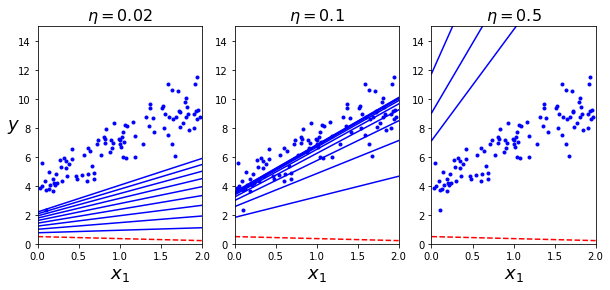

In [3]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

可以看出：

- 左图的学习率太低：在前十步依然无法找到解决方案，但是只要结果长时间的迭代就一定可以找到解决方案；

- 中间的学习率看起来非常的棒：几次迭代就收敛出了最终解；

- 而右边的学习率太高：算法发散，直接跳过了数据区域，并且每一步都离实际解决方案越来越远。

要找到合适的学习率，可以使用[网络搜索](https://blog.csdn.net/weixin_45488228/article/details/99235845)。但是你可能需要限制迭代次数，这样网络搜索就可以淘汰掉那些收敛耗时太长的模型。

然而怎么限制迭代次数呢？如果设置太低，算法可能在离最优解还很远时就停止了；但是如果设置得太高，模型到达最优解后，继续迭代参数不再变化，又会浪费时间。

一个简单的方法时，在开始设置一个非常大的迭代次数，但是当梯度向量的值变得很微小时中断算法——也就是当他的范数变得低于 $\varepsilon$（称为容差）时，因为这是梯度下降已经（几乎）到达了最小值。

> `收敛率`：当成本函数为凸函数，并且斜率没有陡峭的变化时（如 MSE 成本函数），通过批量梯度下降可以看出一个固定的学习率有一个收敛率，为 $o(\frac{1}{迭代次数})$。换句话说，如果将容差 $\varepsilon$ 缩小为原来的1/10（以得到更精确的解），算法将不得不运行 10 倍的迭代次数。

### 1.1.2 Python 实现 BGD

Python 实现批量梯度下降计算线性回归模型 $\theta$：

theta:
[[4.20831857]
 [2.79226572]]



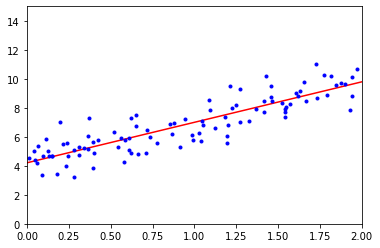

In [4]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance

eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
print('theta:\n{}\n'.format(theta))

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta)

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

利用批量梯度下降法计算的 theta 结果与[标准方程法]()的结果一致！

## 1.2 随机梯度下降（SGD）

批量梯度下降的主要问题时它要用整个训练集来计算每一步的梯度，所以训练集很大时，算法会特别慢。与之相反的极端是`随机梯度下降`（Stochastic Gradient Descent），每一步在训练集中随机选择一个实例，并且仅基于该单个实例来计算梯度。显然，这让算法变得快多了，因为每个迭代都只需要操作少量的数据。它也可以被用来训练海量的数据集，因为每次迭代只需要在内存中运行一个实例即可（ SGD 可以作为核外算法实现）。

另一方面，由于算法的随机性质，它比批量梯度下降要不规则得多。成本函数将不再是缓缓降低知道抵达最小值，而是不断上上下下，但是从整体来看，还是在慢慢下降。随着时间的推移，最终会非常接近最小值，但是即使它到达了最小值，依然还会持续反弹，永远不会停止。所以算法停下来的参数值肯定是足够好的，但不是最优的。

<img style="float:center" src="https://x1a-alioss.oss-cn-shenzhen.aliyuncs.com/Screen Shot 2019-08-14 at 01.11.52.png" width="520" >

**当成本函数非常不规则时**（如高原的例子），随机梯度下降其实可以帮助算法跳出局部最小值，所以**相比批量梯度下降，它对找到全局最小值更有优势。**

因为，随机性的好处在于可以逃离局部最优，但缺点是永远定位不出最小值。要解决这个困境，有一个办法时逐步降低学习率。开始的步长比较大（这有助于快速进展和逃离局部最小值），然后越来越小，让算法尽量靠近全局最小值。这个过程叫做`模拟退火`，因为它类似于冶金时融化的金属慢慢冷却的退火过程。确定每个迭代学习率的函数叫作`学习计划`。如果学习率降得太快，可能会陷入局部最小值，甚至是停留在走向最小值的半途中。如果学习率太慢，你可能需要太长时间太能跳到差不多最小值附近，如果提早结束训练，可能只得到一个次优的解决方案。

### 1.2.1 Python 实现 SGD

按照惯例，我们用 m 来表示迭代次数，每一次迭代称为一轮。

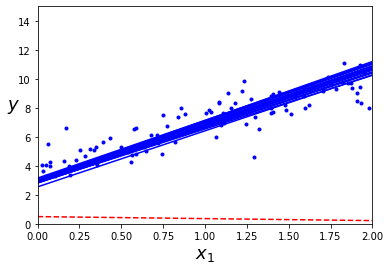

array([[3.954103  ],
       [3.03548045]])

In [5]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance

theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                

plt.plot(X, y, "b.")                                
plt.xlabel("$x_1$", fontsize=18)                    
plt.ylabel("$y$", rotation=0, fontsize=18)          
plt.axis([0, 2, 0, 15])                             
plt.show()              
theta

前面的批量梯度下降需要在整个训练集上迭代 1000 次，而这段代码只迭代了 50 次就得到了一个相当不错的解。

### 1.2.2 Sklearn 实现 SGD

在 Scikit-Learn 里，用 SGD 执行线性回归可以使用 [sklearn.linear_model.SGDRegressor](http://lijiancheng0614.github.io/scikit-learn/modules/generated/sklearn.linear_model.SGDRegressor.html) 类，其默认优化的成本函数是平方误差。

我们从学习率为 0.1（eta0=0.1）开始，使用默认学习计划（与之前的学习计划不同）运行了 50 轮，并且没有使用任何的正则化（penalty=None），将得到一个跟标准方程的解非常相近的解决方案：

In [6]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([3.9539613]), array([3.05185657]))

## 1.3 小批量梯度下降（MBGD）

`小批量梯度下降`（Mini-Batch Gradient Descent）：每一步的梯度计算，既不是基于整个训练集（如批量梯度下降），也不是基于单个实例（如随机梯度下降），而是基于一小部分随机的实例（也就是小批量）。

相比随机梯度下降，小批量梯度下降的主要优势在于可以从矩阵运算的硬件优化中获得显著的性能提升，特别是需要用到图形处理器时。MBGD 算法在参数空间层面的前进过程也不像 SGD 那么不稳定，特别是批量较大时。所以小批量梯度下降最终会比 SGD 更接近最小值一些。但是另一方面，它可能更难从局部最小值中逃脱。

# 2. 三类梯度下降的比较

如下图所示，三种梯度下降算法在训练过程中参数空间里的行进路线，它们最终都汇集在最小值附近，批量梯度下降最终停在了最小值上，而随机梯度下降和小批量梯度下降还在继续游走。但是批量梯度下降花费了大量时间来计算每一步，而用好了学习计划，梯度下降和小批量梯度下降也同样能达到最小值。

In [7]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [8]:
theta

array([[3.9746783 ],
       [3.07082231]])

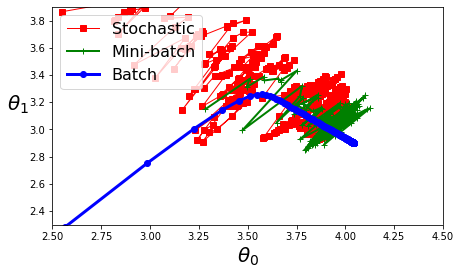

In [9]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

最后，我们来比较一下目前为止所讨论过的线性回归算法（ m 是训练实例的数量，n 是特征数量）：

<img style="float:center" src="https://x1a-alioss.oss-cn-shenzhen.aliyuncs.com/Screen Shot 2019-08-14 at 01.26.53.png" width="820" >


# 参考资料

[1] 周志华. 机器学习[M]. 北京: 清华大学出版社, 2016: 106-115.